In [1]:
# -*- coding: utf-8 -*-
"""
This script uses the modules for loading MagSpec images to display quick
information about the MagSpec images.

This initial test script uses data saved on my personal latop

Doss - 7/10/2023
"""
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "../")
import modules.MagSpecAnalysis as MagSpecAnalysis

#I use another version of pngTools because the current version
# is incompatible with my version of python?  Eventually merge these...
#sys.path.insert(0, "../../dataanalysis-notebook/functions/")
#from pngTools import nBitPNG

In [2]:
#superpath = "C:/Users/chris/Desktop/cedoss_htu_data/"
superpath = "Z:/data/Undulator/Y2023/07-Jul/23_0713/scans"
scannumber = 20
shotnumber = 20

spec_folderpath = "U_HiResMagCam-interpSpec"
suffix = ".txt"
specpath = MagSpecAnalysis.CompileImageDirectory(superpath, scannumber, shotnumber, spec_folderpath, suffix)
energy_arr, spec_charge_arr = MagSpecAnalysis.ParseInterpSpec(specpath)

folderpath = "U_HiResMagCam-interp"

image = MagSpecAnalysis.LoadImage(superpath, scannumber, shotnumber, folderpath)
charge =         MagSpecAnalysis.GetShotCharge(superpath, scannumber, shotnumber)

charge_arr = MagSpecAnalysis.CalculateChargeDensityDistribution(image)

peak_charge =    MagSpecAnalysis.CalculateMaximumCharge(charge_arr)
average_energy = MagSpecAnalysis.CalculateAverageEnergy(charge_arr, energy_arr)
sigma_energy =   MagSpecAnalysis.CalculateStandardDeviationEnergy(charge_arr, energy_arr)
peak_energy =    MagSpecAnalysis.CalculatePeakEnergy(charge_arr, energy_arr)

TESTING V2
TESTING V2


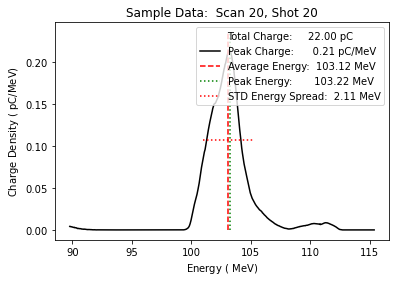

In [10]:
#plt.plot(energy_arr,spec_charge_arr)#Generally uncalibrated
plt.plot(energy_arr,charge_arr,c='k',ls='solid',label="Peak Charge:"+"{:10.2f}".format(peak_charge)+" pC/MeV")
plt.plot([average_energy,average_energy],[0,max(charge_arr)*1.1],c='r',ls='dashed', label="Average Energy:"+"{:8.2f}".format(average_energy)+" MeV")
plt.plot([peak_energy,peak_energy],[0,max(charge_arr)*1.1],c='g',ls='dotted', label="Peak Energy:"+"{:13.2f}".format(peak_energy)+" MeV")
plt.plot([average_energy-sigma_energy,average_energy+sigma_energy],[0.5*peak_charge,0.5*peak_charge],c='r',ls='dotted',label="STD Energy Spread:"+"{:6.2f}".format(sigma_energy)+" MeV")
plt.xlabel("Energy "+r'$(\mathrm{\ MeV})$')
plt.ylabel("Charge Density "+r'$(\mathrm{\ pC/MeV})$')
plt.title("Sample Data:  Scan "+str(scannumber)+", Shot "+str(shotnumber))
plt.legend(title="Total Charge:"+"{:10.2f}".format(charge)+" pC")
plt.show()

In [13]:
threshold = 0.01 #Ignore slices with < 0.01% of peak slice charge compared to peak beam charge
sigma_arr, x0_arr, amp_arr, err_arr = MagSpecAnalysis.FitTransverseGaussianSlices(image, threshold)
average_size = MagSpecAnalysis.CalculateAverageSize(sigma_arr, amp_arr)

C:\Python37\Lib\site-packages\scipy\optimize\minpack.py:449: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


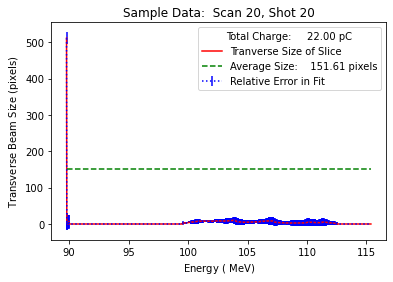

In [14]:
plt.errorbar(energy_arr, sigma_arr, yerr=err_arr*10,c='b', ls='dotted',label="Relative Error in Fit")
plt.plot(energy_arr, sigma_arr, c='r', ls='solid', label = "Tranverse Size of Slice")
plt.plot([energy_arr[0],energy_arr[-1]],[average_size,average_size],c='g',ls='dashed',label="Average Size:"+"{:10.2f}".format(average_size)+" pixels")
plt.xlabel("Energy "+r'$(\mathrm{\ MeV})$')
plt.ylabel("Transverse Beam Size "+r'$(\mathrm{pixels})$')
plt.title("Sample Data:  Scan "+str(scannumber)+", Shot "+str(shotnumber))
plt.legend(title="Total Charge:"+"{:10.2f}".format(charge)+" pC")
plt.show()

In [15]:
##43 ums / pixel

linear_fit = MagSpecAnalysis.FitBeamAngle(x0_arr, amp_arr, energy_arr)
projected_axis, projected_arr, projected_size = MagSpecAnalysis.CalculateProjectedBeamSize(image)
anglefunc = energy_arr*linear_fit[0]+linear_fit[1]

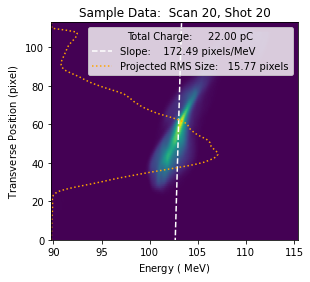

In [16]:
plt.imshow(image, aspect=.2, extent=(energy_arr[0],energy_arr[-1],0,np.shape(image)[0]))
plt.plot(energy_arr, anglefunc, c='white', ls='dashed', label="Slope:"+"{:10.2f}".format(linear_fit[0])+" pixels/MeV")
plt.plot(projected_arr*20+min(energy_arr),projected_axis,c='orange',ls='dotted',label="Projected RMS Size:"+"{:8.2f}".format(projected_size)+" pixels")
plt.xlabel("Energy "+r'$(\mathrm{\ MeV})$')
plt.ylabel("Transverse Position "+r'$(\mathrm{pixel})$')
plt.title("Sample Data:  Scan "+str(scannumber)+", Shot "+str(shotnumber))
plt.ylim([0,np.shape(image)[0]])
plt.xlim([min(energy_arr),max(energy_arr)])
plt.legend(title="Total Charge:"+"{:10.2f}".format(charge)+" pC")
plt.show()